# Deteksi Penyakit Liver Menggunakan Pendekatan Machine Learning

[Dataset](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records?resource=download) ini memiliki **583** data pasien dengan berbagai variabel dan kategori kelas setiap pasien. Variabel yang dimaksud di sini adalah fitur non-numerik seperti Gender, serta fitur numerik seperti Age, Total Bilirubin, Direct Bilirubin, Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase, Total Proteins, Albumin dan Albumin & Globulin Ratio. Kesepuluh fitur ini adalah fitur yang akan digunakan dalam menemukan pola pada data, sedangkan Class merupakan fitur target.


**Metodologi**

Metodologi pada proyek ini adalah: membangun model regresi dengan kelas kategori pasien sebagai target.


**Metrik**

Metrik digunakan untuk mengevaluasi seberapa baik model Anda dalam memprediksi harga. Untuk kasus regresi, beberapa metrik yang biasanya digunakan adalah Mean Squared Error (MSE) atau Root Mean Square Error (RMSE). Secara umum, metrik ini mengukur seberapa jauh hasil prediksi dengan nilai yang sebenarnya. Kita akan bahas lebih detail mengenai metrik ini di modul Evaluasi.

Berdasarkan model yang terbentuk, akan dipilih satu model yang memiliki nilai kesalahan prediksi terkecil. Dengan kata lain, kita akan membuat model seakurat mungkin, yaitu model dengan nilai kesalahan sekecil mungkin.

**Tahap Preprocessing**

tahap ini terdiri dari:

- Data loading
- Exploratory Data Analysis - Deskripsi Variabel
- Exploratory Data Analysis - Menangani Missing Value dan Outliers
- Exploratory Data Analysis - Univariate Analysis
- Exploratory Data Analysis - Multivariate Analysis


---


# Tahap Preprocessing

In [40]:
# import library
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [41]:
#load data
data = pd.read_csv('indian_liver_patient.csv')
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Liver
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Liver
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Liver
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Liver
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Liver
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,Non Liver
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,Liver
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,Liver
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,Liver


**Exploratory Data Analysis(EDA)**

Tahapan ini bertujuan untuk memahami data, melalui diskripsi data maupun secara visualisasi.

*Perlu diingat bahwa penerapan teknik EDA tentu berbeda antara satu data dan lainnya.*


In [42]:
#EDA deskripsi variabel 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


Variabel-variabel pada *Indian Patient Liver* dataset dapat dijelaskan sebagai berikut.
- *Age* : Usia pasien
- *Gender* :Jenis kelamin pasien
- *Total Bilirubin* : Jumlah sel darah merah dihati (mg/dl) 
- *Direct Bilirubin* : Bilirubin bebas (mg/dl)
- *Alkaline Phosphotase* : Enzim yang terkandung dari usus
- *Alamine Aminotransferase* : Enzim yang terkandung didalam hati
- *Aspartate Aminotransferase* : Enzim protein yang berada didalam hati
- *Total Protiens* : Serum protein yang terdapat didalam hati (g/dl)
- *Albumin* : Sintesa protein didalam hati
- *Albumin and Globulin Ratio* : Menunjukkan perbandingan rasio albumin dan globulin didalam hati
- *Dataset* : Kategori kelas pasien yang menderita dan tidak menderita penyakit Liver.

Berdasarkan sebelas variabel yang terdapat pada dataset tersebut, terdapat empat variabel penting yang menentukan pasien menderita penyakit Liber yaitu, peningkatan *Total bilirubin*, peningkatan *Alamine Aminotranferase*, peningkatan *Aspartate Aminotransferase*, dan penurunan kadar *Albumin*.

In [43]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


Berdasarkan hasil dari diskripsi data tersebut, menunjukkan bahwa ;
1. Rata-rata usia pasien terindikasi penyakit Liver yaitu 44 tahun, dimana pasien yang paling tertua berusia 90 tahun.
2. 441 pasien berjenis kelamin laki-laki dan 142 pasien berjenis kelamin perempuan.
3. Rata-rata total kadar bilirubin dalam tubuh pasien yaitu sebesar 3,29 g/mol, dimana yang paling tertinggi yaitu 75 g/mol. Karena antara nilai kandungan bilirubin tertinggi dengan nilai rata-rata terpaut cukup jauh, maka hal tersebut mengindikasikan terdapat data outlier pada variabel Total  bilirubin.
4. Sedangkan rata-rata kadar albumin pasien yaitu sebesar 3,14 mg/dl dan yang tertinggi sebesar 5,50 mg/dl, dimana kisaran normal albumin adalah 0-8 mg/dl.


In [44]:
data_null = data['Albumin_and_Globulin_Ratio'].isnull().sum() #cek missing value atau data.isna().sum()
print('jumlah data yang kosong di fitur Albumin_and_Globulin_Ratio: ', data_null)

jumlah data yang kosong di fitur Albumin_and_Globulin_Ratio:  4


Ternyata terdapat data yang missing value yaitu pada data Albumin and Globulin Ratio. Memiliki 4 data yang hilang. Sehingga diperlukan suatu metode untuk mengatasi hal tersebut.

Terdapat 3 cara dalam mengatasi **missing value**;
1. Dibiarkan
2. Mengahapus varaibel atau baris data yang mengandung missing value==> .dropna()
3. Mensubtitusikan nilai mean/ median/ modus kedalam variabel atau baris data yang mengandung missing value==> .fillna()



 *Albumin merupakan protein utama yang memiliki struktur sederhana dengan jumlah sedikit di dalam sel, sedangkan globulin merupakan protein sederhana dengan jumlah banyak di dalam plasma dan sel*. *missing value* pada variabel tersebut akan diisi dengan nilai rata-rata dari kadar albumin dan globulin seluruh pasien.

 **Selanjutnya, mari kita atasi variabel yang terdapat *missing value* tersebut dengan cara mensubtitusikan nilai *mean*.**


In [45]:
#mengatasi missing value
rata_ag = data['Albumin_and_Globulin_Ratio'].mean()
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(rata_ag)
cek = data['Albumin_and_Globulin_Ratio'].isna().sum()
print('jumlah missing value pada fitur Albumin_and_Globulin_Ratio saat ini : ', cek )

jumlah missing value pada fitur Albumin_and_Globulin_Ratio saat ini :  0


In [46]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


Karena nilai *missing value* variabel *Albumin and Globulin Ratio* sudah teratasi, maka mari kita lanjutkan ke tahapan selanjutnya yaitu menangani *outliers*.

**EDA Mengatasi Outliers**

Outlier merupakan data yang memiliki karakteristik yang berbeda jauh dari observasi-observasi lainnya dan muncul dalam bentuk nilai ekstrim baik untuk variabel tunggal atau variabel kombinasi. Ia adalah **hasil pengamatan yang kemunculannya sangat jarang dan berbeda dari data hasil pengamatan lainnya**. 

Ada beberapa teknik untuk menangani outliers, antara lain:

- Hypothesis Testing
- Z-score method
- IQR Method

Pada kasus ini, Anda akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, akan menangani outliers dengan teknik IQR method.

Sekarang, mari kita visualisasikan data dengan boxplot untuk mendeteksi outliers pada beberapa fitur numerik.

In [47]:
#categorical columns
cat = ['Dataset', 'Gender']
#continuous columns
conti =[ 'Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

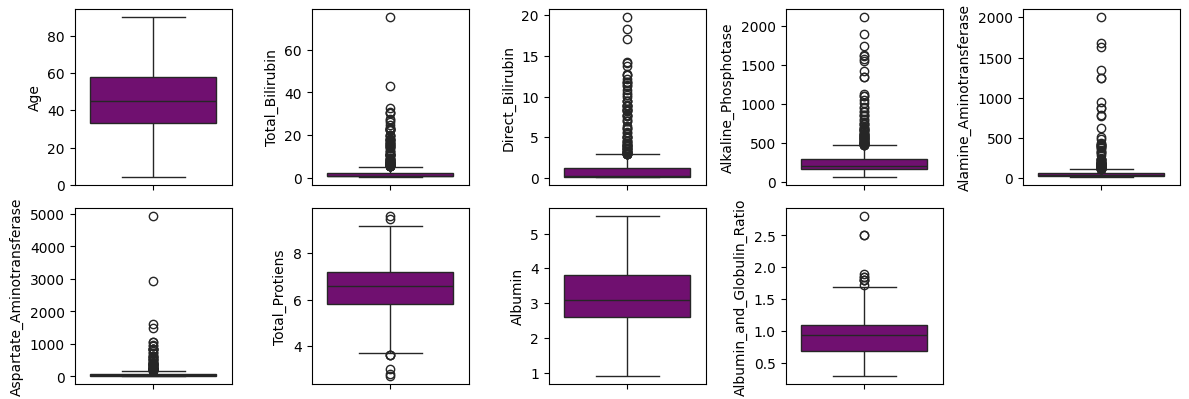

In [48]:
#cek outlier menggunakan grafik boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
for i in range(0, len(conti)):
  plt.subplot(6, 5 , i+1)
  sns.boxplot(data[conti[i]], color='purple', orient='v')
  plt.tight_layout()
# sns.boxplot(data['Asportate_Aminotransferase'], color='green', orient='v')

Dapat diketahui bahwa 7 dari 9 variabel kontinu memiliki data outlier. Sehingga untuk mengatasi hal tersebut, akan diatasi menggunakan metode IQR. Data yang berada diluar nilai Q3 dan Q1 akan dianggap sebagai data outlier dan akan dihapus.

In [49]:
#mengatasi outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

## CODE HERE
filtered_entries = np.array([False] * len(data))
for col in ['Total_Bilirubin', 'Direct_Bilirubin', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] < low_limit) | (data[col] > high_limit)) | filtered_entries
    
data = data[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 583
Jumlah baris setelah memfilter outlier: 440


In [50]:
#cek apakah ada data duplikat
print(data.duplicated().sum())
#apabila terdapat data duplicate, maka dapat diatasi dengan cara menghilangkan data tersebut
data.drop_duplicates(inplace=True)
#cek
print(data.duplicated().sum())

10
0


C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_12596\846309231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [51]:
data.shape

(430, 11)

Setelah data outliers sudah diatasi, ukuran data menjadi  440 baris dari 11 kolom. Langkah selanjutnya yaitu melakukan EDA Univariate Analysis.

**EDA Univariate Analysis**

In [52]:
#berikut adalah sebaran nilai pada variabel kategori
for col in cat:
  print(f'''Value count kolom {col}: ''')
  print(data[col].value_counts())
  print()

Value count kolom Dataset: 
Dataset
Liver        272
Non Liver    158
Name: count, dtype: int64

Value count kolom Gender: 
Gender
Male      311
Female    119
Name: count, dtype: int64



Text(0.5, 1.0, 'PROPORSI JENIS KELAMIN PASIEN(%)')

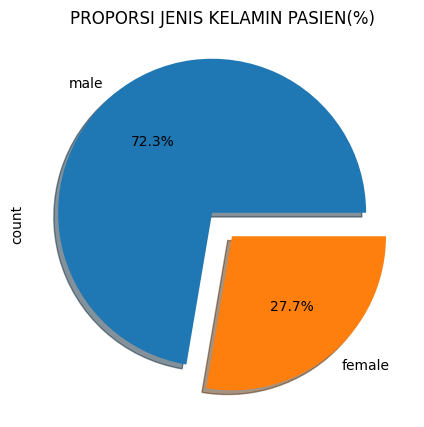

In [53]:
import matplotlib.pyplot as plt
labels = 'male','female'
data['Gender'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI JENIS KELAMIN PASIEN(%)")

Grafik tersebut memberikan informasi bahwa 72,3% pasien berjenis kelamin laki-laki, sedangkan 27,7% lainnya merupakan perempuan.

Text(0.5, 1.0, 'PROPORSI KATEGORI PASIEN(%)')

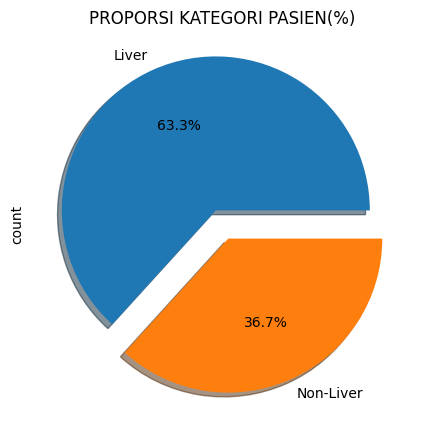

In [54]:
labels1 = 'Liver','Non-Liver'
data['Dataset'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels1, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI KATEGORI PASIEN(%)")

Sedangkan untuk Grafik Proporsi Kategori Pasien menjelaskan 63,3% merupakan pasien yang terindikasi menderita penyakit Liver, sedangkan 36,7% pasien tidak terindikasi penyakit Liver.

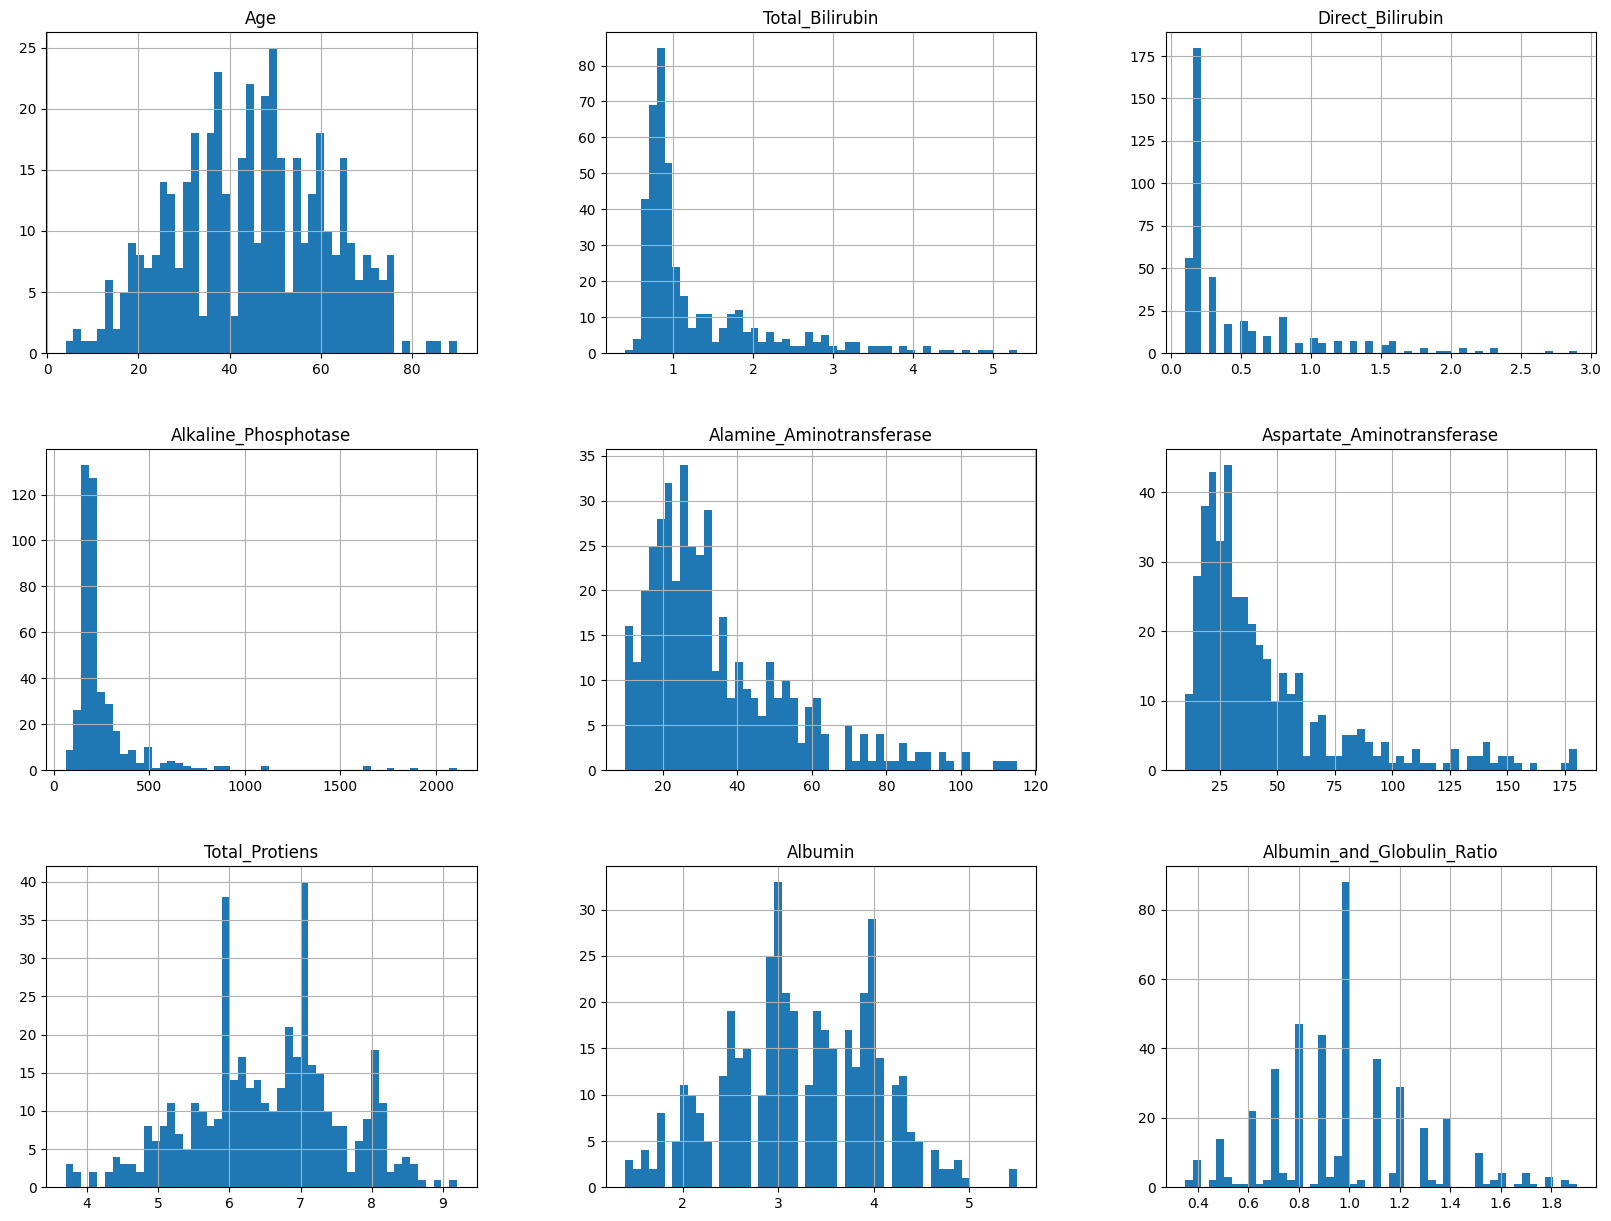

In [55]:
#numerical features
data.hist(bins=50, figsize=(20,15))
plt.show()

Informasi yang ditunjukkan pada Histogram diatas yaitu :

- Variabel *Age, Total Proteins, Albumin* dan *Albumin and Globulin Ratio* memiliki distribusi data hampir mendekai distribusi normal
- Sedangkan pada variabel *Total Bilirubin, Direct Bilirubin, Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase* memiliki distribusi yang miring (*skewness*) ke kanan. Hal ini akan berimplikasi pada model.

Untuk EDA selanjutnya yaitu menjelaskan tentang EDA Multivariate Analysis.

**EDA Multivariate Analysis**

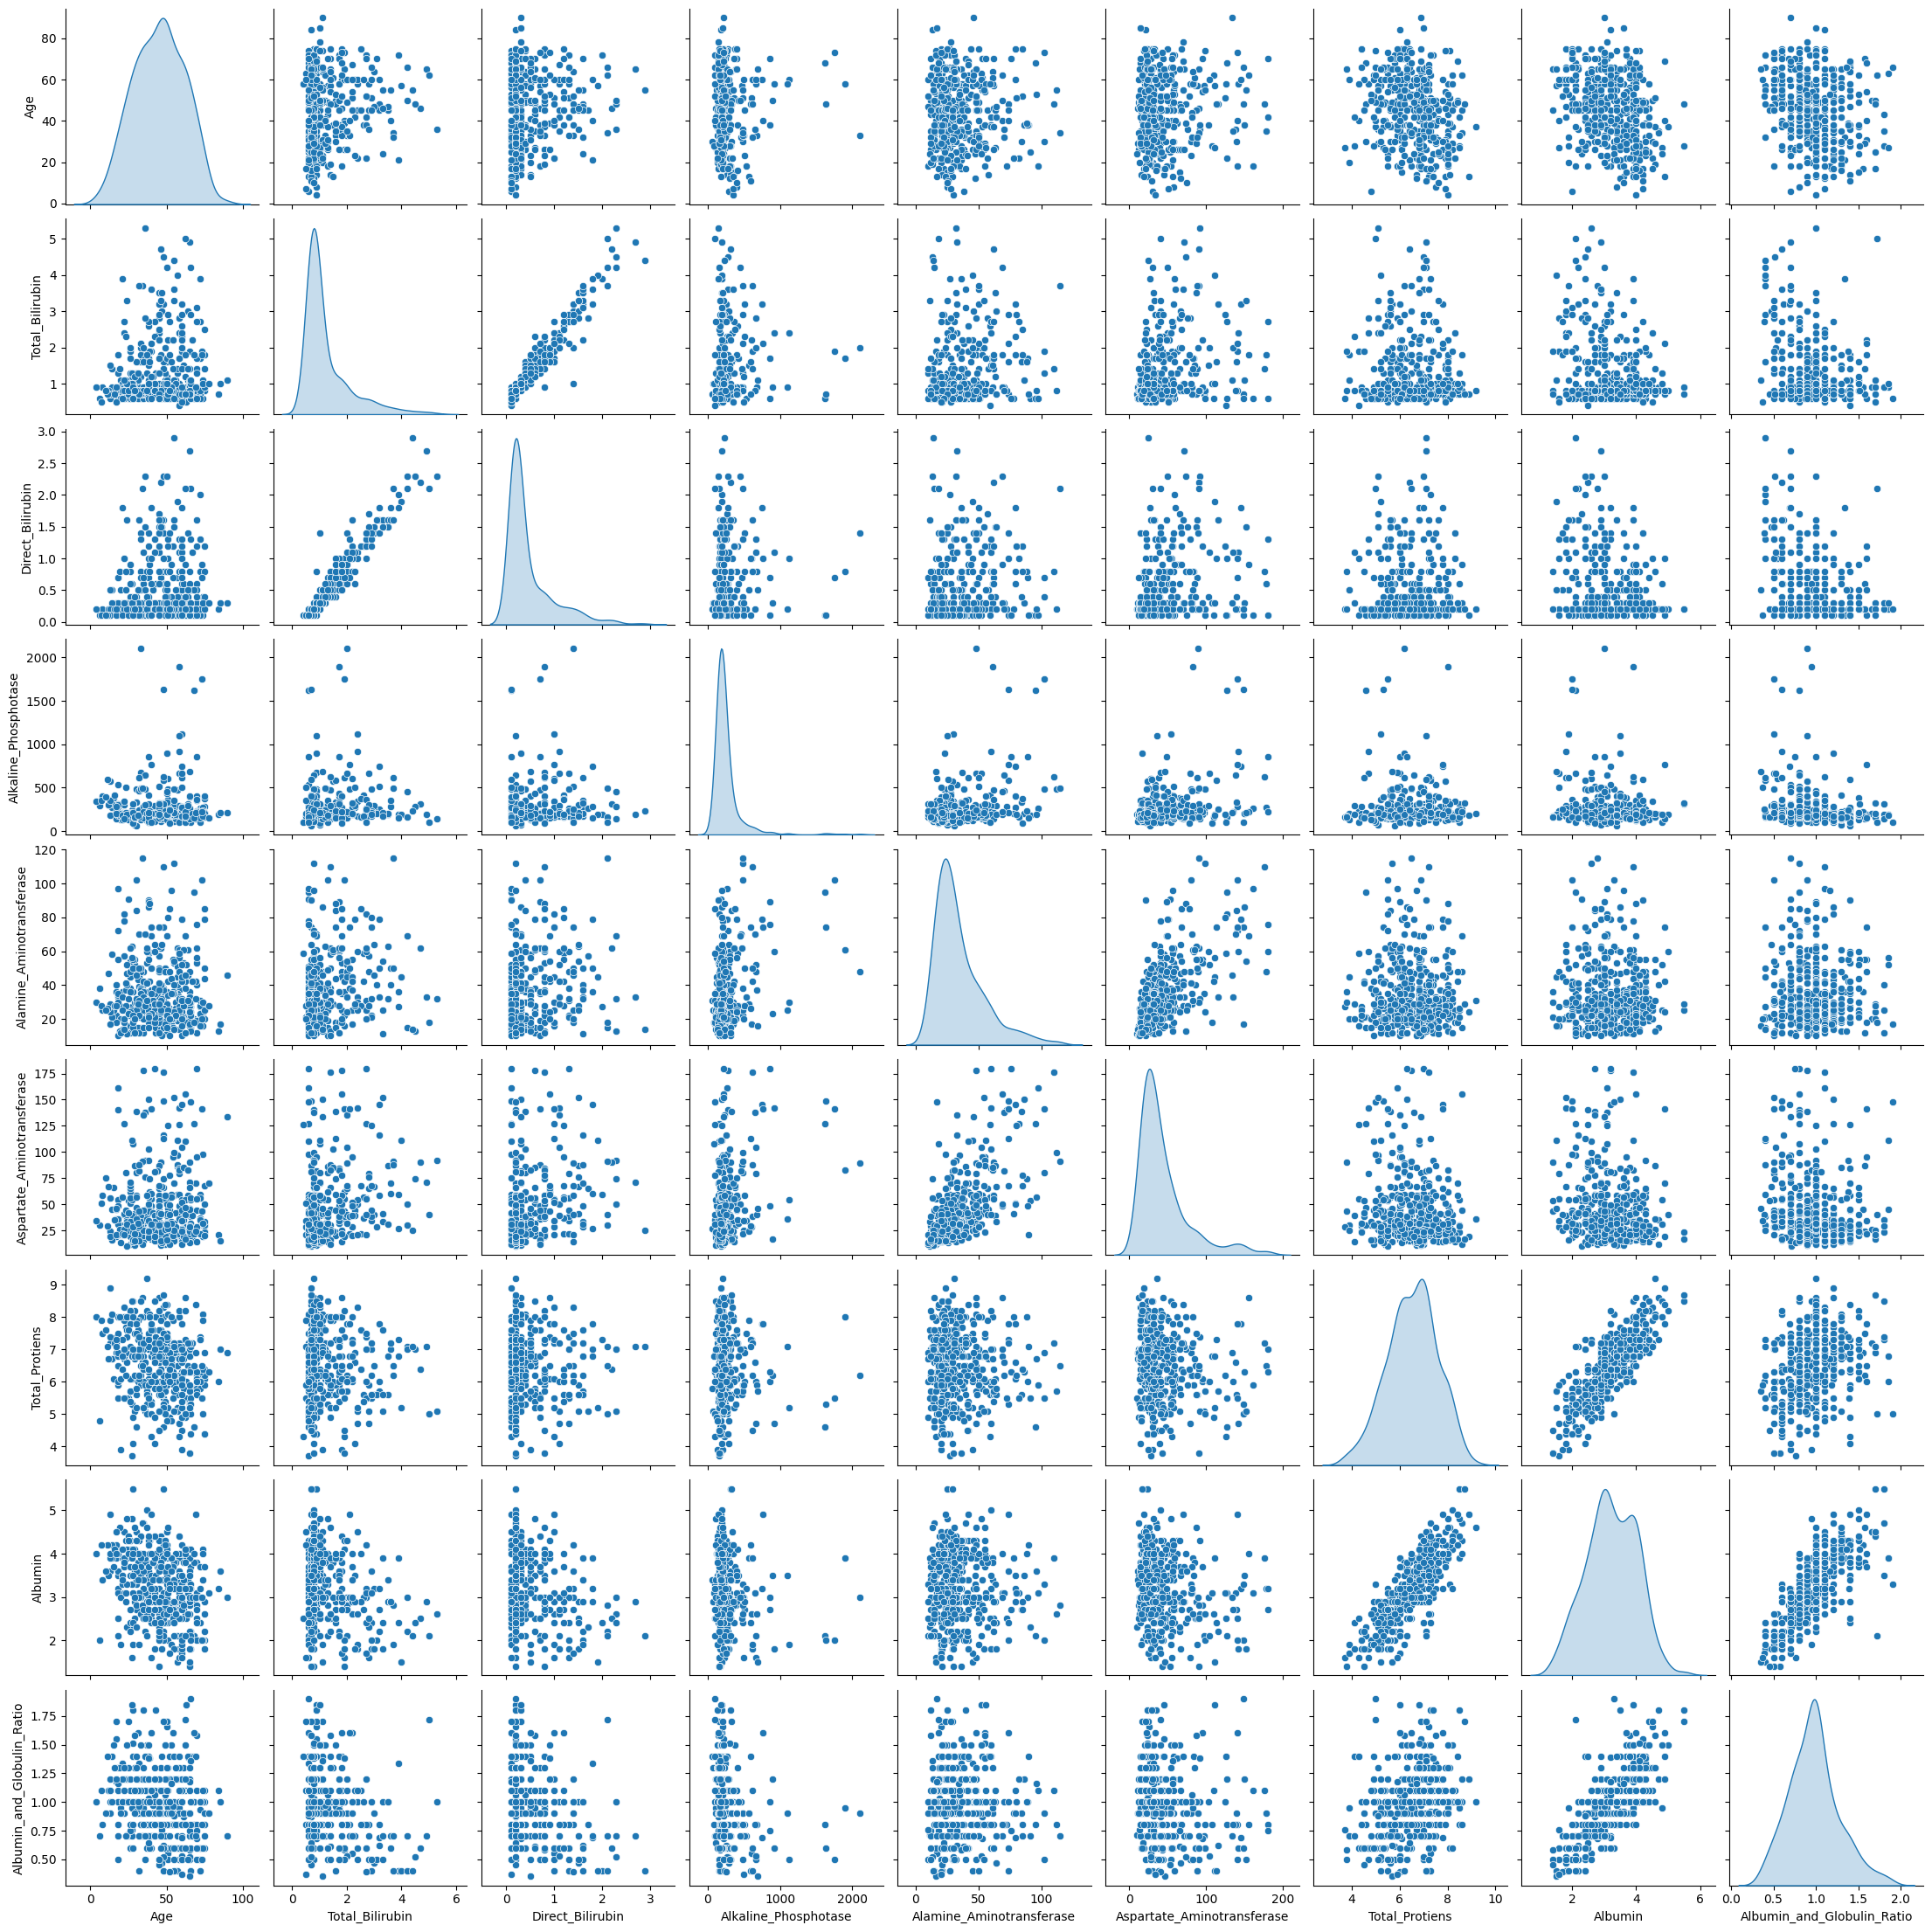

In [56]:
#numerical features

# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(data, diag_kind = 'kde')

*Fungsi pairplot dari library seaborn menunjukkan relasi pasangan dalam dataset.* Pada kasus ini, kita akan melihat relasi antara semua fitur numerik. 

Pada pola sebaran data grafik pairplot tersebut, terlihat bahwa terdapat beberapa variabel yang memiliki korelasi yang cukup tinggi satu sama lain, variabel tersebut erdiri dari :
- *Total Bilirubin* dan *Direct Bilirubin*
- *Alamine Aminotransferase* dan *Aspartate Aminotransferase* 
- *Albumin* dan *Albumin and Globulin Ratio*

Hubungan atau korelasi yang cukup tinggi antar variabel independen dapat mengindikasikan bahwa terdapat **Multikolinearitas**. Untuk mengevaluasi skor korelasinya, gunakan fungsi corr().


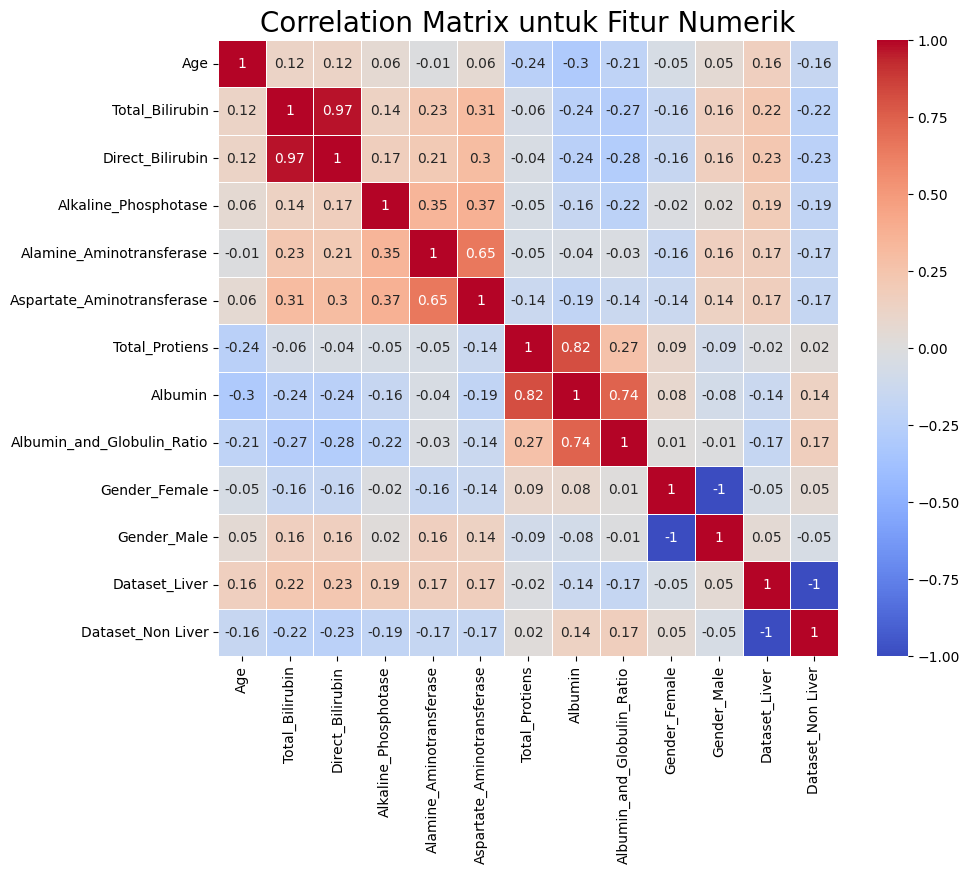

In [57]:
# Pilih hanya kolom numerik
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Konversi variabel kategorik ke dummy variables jika diperlukan
categorical_data = data.select_dtypes(include=['object'])
dummy_variables = pd.get_dummies(categorical_data)

# Gabungkan data numerik dan dummy variables
final_data = pd.concat([numeric_data, dummy_variables], axis=1)

# Hitung matriks korelasi untuk data yang sudah diolah
correlation_matrix = final_data.corr().round(2)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix untuk Fitur Numerik', size=20)
plt.show()


Nah, pada grafik korelasi di atas. **Jika kita amati, variabel 'Total Bilirubin' dan ‘'Direct Bilirubin' memiliki skor korelasi yang besar (di atas 0.9) dengan antar satu sama lain**. Artinya, fitur tersebut terindikasi memiliki Multikolinearitas ([Multikolinearitas](https://www.statistikian.com/2016/11/multikolinearitas.html) adalah sebuah situasi yang menunjukkan adanya korelasi atau hubungan kuat antara dua variabel bebas atau lebih dalam sebuah model regresi). *Sehingga untuk tahap preparation akan dilakukan reduksi dimensi data untuk kedua variabel tersebut.*

# Data Preparation

Data *preparation* atau biasa disebut sebagai tahapan data *preprocessing* merupakan tahapan yanng dilakukan karena dapat memberikan fungsi atau manfaat pada data mining. Proses ini utamanya dilakukan untuk memastikan kualitas data baik sebelum digunakan saat analisis data. Terdapat empat tahap yang digunakan dalam proses *preprocessing* projek, yaitu ;

- Label Encoding fitur kategori.
- Reduksi dimensi dengan Principal Component Analysis (PCA).
- Data traininig dan Data Testing.
- Standarisasi.

---



**Label Encoding Fitur Kategori**

Tahapan ini bertujuan untuk merubah data kategorik menjadi data numerik, dimana library Python yang paling umum digunakan adalah Scikit-Learn. Terdapat dua variabel yang bertipe data kategori yaitu variabel Gender dan Class. Kedua variabel tersebut akan dirubah menjadi numerik menggunakan fungsi LabelEncoder yang terdapat pada *library* sklearn.preprocessing. Setelah fungsi LabelEncoder dibentuk, maka kemudian lakukan proses fit_transform() dengan kolom variabel yang akan dirubah.

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.apply(le.fit_transform)
data

,Age,Gender,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,dimension
0,58,0,67,6,8,29,19,24,0,4
3,52,1,62,4,10,29,20,31,0,15
4,64,1,75,17,49,34,10,3,0,103
5,40,1,86,9,4,37,30,38,0,50
6,20,0,34,6,2,31,21,31,0,10
...,...,...,...,...,...,...,...,...,...,...
578,53,1,175,10,24,20,2,1,1,1
579,34,1,4,25,21,21,18,34,0,2
580,46,1,110,38,39,25,18,31,0,7
581,25,1,64,19,22,29,20,31,0,26


Sekarang variabel kategori yang kita miliki, sudah menjadi varibel kategorik.



**Reduksi Dimensi dengan PCA**

[*Principal Component Analysis* (PCA)](https://dqlab.id/analisis-pca-sederhanakan-data-dengan-reduksi-dimensi-menggunakan-r) adalah salah satu metode reduksi dimensi pada machine learning. PCA akan memilih variabel-variabel yang mampu menjelaskan sebagian besar variabilitas data. PCA mengurangi dimensi dengan membentuk variabel-variabel baru yang disebut Principal Components. . Principal Components yang merupakan kombinasi linier dari variabel-variabel lama. Penghitungan Varians dan Principal Component ini dapat dilakukan dengan menggunakan konsep nilai eigen (eigenvalue) dan vektor eigen (eigenvector) dari ilmu Aljabar Linier.

---
Manfaat dari penggunaan PCA yaitu, mengatasi multikolinearitas; mereduksi jumlah variabel yang akan dimasukkan kedalam model; jumlah variabel yang lebih sedikit tenu akan menyederhanakan model; dan juga mempercepat komputasi.
Penggunaan PCA pada projek ini, digunakan untuk mereduksi variabel *Total Bilirubin* dan *Direct Bilirubin* dibentuk menjadi satu dimensi, karena kedua variabel memiliki nilai korelasi yang cukup tinggi. Sehingga mereduksinya menjadi satu variabel atau dimensi, dapat mambantu mempercepat proses 
komputasi dan yang lainnya.

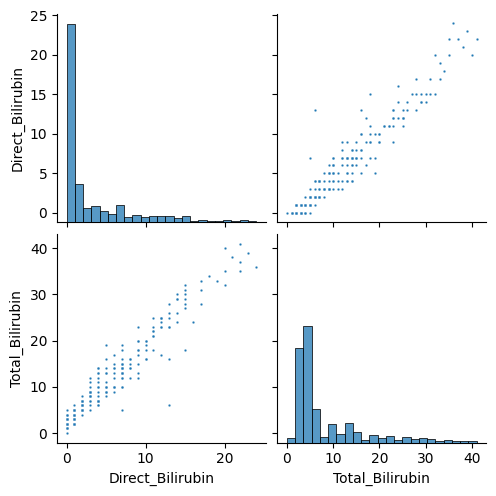

In [59]:
sns.pairplot(data[['Direct_Bilirubin', 'Total_Bilirubin']], plot_kws={'s':3});

Terbukti pada grafik tersebut, bahwa variabel atau fitur *Total Bilirubin* dan *Direct Bilirubin* memiliki korelasi yang cukup tinggi. Sehingga untuk selanjutnya, melakukan PCA pada kedua fitur tersebut dengan mengaplikasikan PCA dari library scikit learn .

- Parameter n_components merupakan jumlah komponen atau dimensi, dalam kasus ini akan kita bentuk menjadi satu dimensi saja, sehingga n_components=1.
- Sedangkan, parameter random_state berfungsi untuk mengontrol random number generator yang digunakan. Berapa pun nilai integer yang kita tentukan --selama itu bilangan integer, ia akan memberikan hasil yang sama setiap kali dilakukan pemanggilan fungsi (dalam kasus kita, class PCA). 
- Tambahkan fitur baru ke dataset dengan nama 'dimension' dan lakukan proses transformasi.
- Drop kolom *Total Bilirubin* dan *Direct Bilirubin*

---
*Menentukan parameter random_state bertujuan untuk dapat memastikan bahwa hasil pembagian dataset konsisten dan memberikan data yang sama setiap kali model dijalankan. Jika tidak ditentukan, maka tiap kali melakukan split, kita akan mendapatkan data train dan tes berbeda. Hal ini berpengaruh terhadap akurasi model ML yang menjadi berbeda tiap kali di-run*. 

---


In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pca.fit(data[['Direct_Bilirubin', 'Total_Bilirubin']])
data['dimension'] = pca.transform(data.loc[:, ('Direct_Bilirubin', 'Total_Bilirubin')]).flatten()
data.drop(['Direct_Bilirubin', 'Total_Bilirubin'], axis=1, inplace=True)

In [61]:
# proporsi informasi dari komponen
pca.explained_variance_ratio_.round(3)

array([0.988])

In [62]:
data.head()

,Age,Gender,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,dimension
0,58,0,67,6,8,29,19,24,0,-6.508286
3,52,1,62,4,10,29,20,31,0,-2.407690
4,64,1,75,17,49,34,10,3,0,28.975734
5,40,1,86,9,4,37,30,38,0,6.017260
6,20,0,34,6,2,31,21,31,0,-4.276550


In [63]:
data.shape

(430, 10)

**Data Training dan Data Testing**

[Training atau Testing Split](https://ilmudatapy.com/evaluasi-model-machine-learning-dengan-train-test-split/) merupakan salah satu metode yang digunakan untuk mengevaluasi peforma model Machine Learning. Metode evaluasi model ini membagi dataset menjadi dua bagian yatu bagian yang digunakan untuk *training* data dan bagian untuk *testing* data dengan proporsi tertentu.

---
**Train data** digunakan untuk *fit* model Machine Learning, sedangkan *test data* digunakan untuk mengevaluasi hasil *fit* model tersebut. Metode train/test split ini akan memberikan hasil prediksi yang lebih akurat untuk data baru atau data yang belum pernah di- *train*. Karena data *testing* tidak digunakan untuk melatih model, maka model tidak mengetahui *outcome* dari data tersebut. Pada projek ini, proporsi pembagian data *training* : *testing* sebesar 90:10.

In [64]:
#train test split
from sklearn.model_selection import train_test_split
X = data.drop(['Dataset'], axis=1)
y = data['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 123)

In [65]:
# untuk menge-cek jumlah masing-masing split
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 430
Total # of sample in train dataset: 387
Total # of sample in test dataset: 43


**Standarisasi**

[Standarisasi](https://anzihory.medium.com/normalisasi-vs-standarisasi-101093633e18) adalah teknik lain dalam melakukan perubahan skala, dimana data yang dimiliki akan diubah sehingga memiliki nilai rata-rata sama dengan nol (terpusat) dan standar deviasi sama dengan satu. Proses standarisasi pada Python, dapat dilakukan dengan cara meng- *import* StandardScaler dari sklearn.preprocessing.

In [77]:
# standarisasi pada data training

from sklearn.preprocessing import StandardScaler
 
numerical_features = [ 'Age', 'Gender', 'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,Gender,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,dimension
count,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02,3.870000e+02
mean,9.180139e-18,5.967090e-17,2.754042e-17,-1.692588e-17,-1.377021e-17,3.213049e-17,-9.180139e-18,-4.590069e-17,1.836028e-17
std,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00,1.001294e+00
min,-2.430249e+00,-1.660506e+00,-1.730540e+00,-1.381943e+00,-1.245746e+00,-2.529739e+00,-2.310241e+00,-2.415340e+00,-9.677484e-01
25%,-7.401543e-01,-1.660506e+00,-7.526398e-01,-7.509981e-01,-7.358322e-01,-5.828185e-01,-6.531519e-01,-5.664686e-01,-6.318604e-01
50%,7.359489e-02,6.022259e-01,-2.025710e-01,-2.921289e-01,-3.435911e-01,1.257701e-03,-1.581003e-02,3.139464e-01,-4.442358e-01
75%,8.247480e-01,6.022259e-01,6.836509e-01,6.256095e-01,5.585635e-01,6.826800e-01,8.764685e-01,5.780709e-01,2.970816e-01
max,2.014074e+00,6.022259e-01,2.405163e+00,3.034673e+00,2.912010e+00,2.337563e+00,2.406089e+00,2.338901e+00,4.076481e+00


Seperti yang telah disebutkan sebelumnya, proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1. Untuk mengecek nilai mean dan standar deviasi pada setelah proses standarisasi, jalankan kode ini:

In [67]:
X_train[numerical_features].describe().round(4)

,Age,Gender,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,dimension
count,387.0000,387.0000,387.0000,387.0000,387.0000,387.0000,387.0000,387.0000,387.0000
mean,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0013,1.0013,1.0013,1.0013,1.0013,1.0013,1.0013,1.0013,1.0013
min,-2.4302,-1.6605,-1.7305,-1.3819,-1.2457,-2.5297,-2.3102,-2.4153,-0.9677
25%,-0.7402,-1.6605,-0.7526,-0.7510,-0.7358,-0.5828,-0.6532,-0.5665,-0.6319
50%,0.0736,0.6022,-0.2026,-0.2921,-0.3436,0.0013,-0.0158,0.3139,-0.4442
75%,0.8247,0.6022,0.6837,0.6256,0.5586,0.6827,0.8765,0.5781,0.2971
max,2.0141,0.6022,2.4052,3.0347,2.9120,2.3376,2.4061,2.3389,4.0765


 Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1. Sampai di tahap ini, data kita telah siap untuk dilatih menggunakan model machine learning. 
 
 ---

# Model Development dengan K-Nearest Neighbor 

[K-Nearest Neighbors atau KNN](https://medium.com/@annisaayunda/knn-k-nearest-neighbors-with-forestfires-dataset-c810e603869d) adalah algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (train data sets), yang diambil dari k tetangga terdekatnya ( *nearest neighbors* ). Dengan k merupakan banyaknya tetangga terdekat.
KNN digunakan untuk klasifikasi dan regresi. KNN hanya sebuah perkirakan, dan semua perhitungan ditunda sampai klasifikasi. Sebuah bobot dapat menetapkan apakah tetangga dekat lebih berpengaruh daripada tetangga yang lebih jauh. Kelebihan metode KNN yaitu mudah diterapkan dan tidak perlu membuat asumsi data sebelumnya. Sedangkan kekurangan metode ini yaitu membutuhkan cukup banyak waktu untuk melakukan prediksi, karena menghitung selisih setiap titik data. Tahapan Langkah algoritma metode [KNN](https://medium.com/@aida.mahmudah171/melakukan-prediksi-kelulusan-dengan-knn-di-jupyter-notebook-4c7c707acd2c) :
1. Menentukan parameter k (jumlah tetangga paling dekat).
2. Menghitung kuadrat jarak eucliden objek terhadap data training yang diberikan.
3. Mengurutkan hasil no 2 secara ascending (berurutan dari nilai tinggi ke rendah)
4. .Mengumpulkan kategori Y (Klasifikasi nearest neighbor berdasarkan nilai k)
5. Dengan menggunakan kategori nearest neighbor yang paling mayoritas maka dapat dipredisikan kategori objek.

In [68]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'SVR', 'LogisticRegression', 'RandomForest'])

# melatih data dengan KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

# Model Development dengan Supoort Vector Machine (SVM)

[Support Vector Machine](https://iansuryap.medium.com/classification-with-support-vector-machine-svm-methode-7ad33d8951b3) adalah suatu teknik untuk melakukan prediksi, baik dalam hal kasus klasifikasi maupun regresi. Metode SVM berada dalam satu kelas dengan *Artificial Neural Network* (ANN) dalam hal fungsi dan kondisi permalasahan yang bisa diselesaikan. Teknik SVM yang digunakan untuk menjawab permasalahan yaitu menggunakan *Support Vector Regression) (SVR).

[Support Vector Regression](https://medium.com/@nurfauziah_uci/support-vector-regression-pada-harga-saham-netflix-dengan-python-2cc9deb169da) adalah salah satu metode regresi dengan menggunakan Machine Learning yang sangat populer. Konsep dari SVR adalh membuat sebuah *hyperplane* yang mendekati titik-titik data yang akan diperediksi, sehingga diperoleh estimasi yang memiliki nilai error yang sangat kecil.

In [69]:
from sklearn.svm import SVR #MODEL SVM
svr = SVR(kernel='linear') 
svr.fit(X_train,y_train)
models.loc['train_mse', 'svr'] = mean_squared_error(y_pred = svr.predict(X_train), y_true=y_train)

# Model Development dengan Logistic Regression

[Logistic Regression](https://medium.com/@rismitawahyu/comparing-analysislogistic-regression-k-nearest-neighbors-k-nn-and-support-vector-machine-svm-67a5d0cc4091) adalah salah satu metode statistika yang menggambarkan hubungan antara variabel respon (y) dengan satu atau lebih variabel prediktor (x), dimana variabel respon dalam regresi logistik adalah biner atau dikotomi yaitu hanya memiliki dua kategori. Hasil untuk setiap pengamatan dapat diklasifikasikan sebagai “sukses” atau “gagal”. Klasifikasi ini diwakili dengan y = 1 untuk hasil pengamatan “sukses” dan y = 0 untuk hasil pengamatan “gagal”. Regresi logistik adalah cara statistik yang kuat dari pemodelan hasil binomial dengan satu atau lebih variabel penjelas. 
Metode ini bekerja dengan cara mengukur hubungan antara variabel target (yang ingin diprediksi) dan variabel input (fitur yang digunakan) dengan fungsi logistik. Probabilitas akan dihitung menggunakan fungsi sigmoid untuk mengubah nilai-nilai tadi menjadi 0 atau 1.

In [70]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
models.loc['train_mse', 'LogisticRegression'] = mean_squared_error(y_pred = LR.predict(X_train), y_true=y_train)

# Model Development dengan Random Forest

Algoritma [Random Forest](https://algorit.ma/blog/cara-kerja-algoritma-random-forest-2022/) disebut sebagai salah satu algoritma machine learning terbaik, sama seperti Naïve Bayes dan Neural Network. Random Forest adalah kumpulan dari decision tree atau pohon keputusan. Algoritma ini merupakan kombinasi masing-masing tree dari decision tree yang kemudian digabungkan menjadi satu model. Biasanya, Random Forest dipakai untuk masalah regresi dan klasifikasi dengan kumpulan data yang berukuran besar. 

---
Random Forest bekerja dengan membangun beberapa decision tree dan menggabungkannya demi mendapatkan prediksi yang lebih stabil dan akurat. ‘Hutan’ yang dibangun oleh Random Forest adalah kumpulan decision tree di mana biasanya dilatih dengan metode bagging. Ide umum dari metode bagging adalah kombinasi model pembelajaran untuk meningkatkan hasil keseluruhan
Algoritma Random Forest meningkatkan keacakan pada model sambil menumbuhkan tree. Alih-alih mencari fitur yang paling penting saat memisahkan sebuah node, Random Forest mencari fitur terbaik di antara subset fitur yang acak. Alhasil, cara ini menghasilkan keragaman yang luas dan umumnya menghasilkan model yang lebih baik.

In [71]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)        

- n_estimator: jumlah trees (pohon) di forest. Di sini kita set n_estimator=50.
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- random_state: digunakan untuk mengontrol random number generator yang digunakan. 
- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

# Evaluasi Model

In [72]:
# proses scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [73]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'SVR', 'LogisticRegression', 'RandomForest'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'SVR': svr, 'LogisticRegression': LR, 'RandomForest': RF}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.000181,0.000259
SVR,0.000276,0.00024
LogisticRegression,0.000346,0.000372
RandomForest,0.000035,0.000227


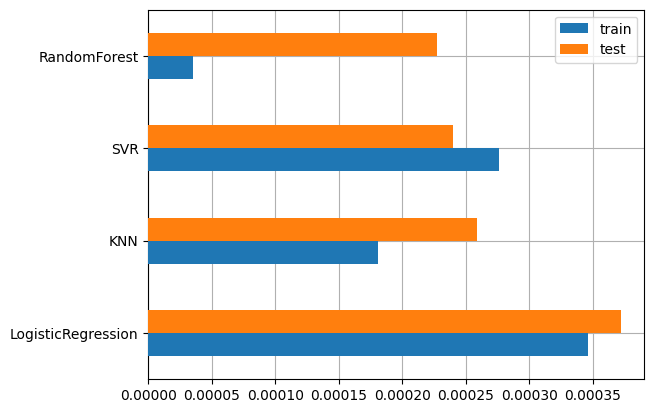

In [74]:
# plot metric dengan bar chart
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Logistic Regression memiliki eror yang paling besar. Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan deteksi penyakit Liver.

In [75]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_SVR,prediksi_LogisticRegression,prediksi_RandomForest
15,1,0.3,0.1,0,0.5


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati.

In [76]:
pickle.dump(knn, open('model_baru_1.pkl','wb'))